In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
G  = np.zeros((10,16))
s2 = np.sqrt(2)
#s2 = 2
for i in range(4):
    i1 = i+1
    G[i, i*4:4*i1] = 1
    G[i+4, i:16:4] = 1
G[8,0] = s2
G[9, 0:16:5] = s2 
#G = G.T

#print(G)

In [4]:
[u, s, v] = np.linalg.svd(G)
v=v.T
n = u.shape[0]
m = v.shape[0]
p = np.linalg.matrix_rank(G)
up = u[:, 0:p]
vp = v[:, 0:p]
sp = s[0:p]

sm = np.eye(p,p)
for i in range(p):
    sm[i,i] = sp[i]
smi = np.linalg.inv(sm)


Cm = s[0]/s[-1]
print(Cm)
Cmp = sp[0]/sp[-1]
print(Cmp)


#print(v)

1.068072935695153e+16
4.62515039996751


Row Space


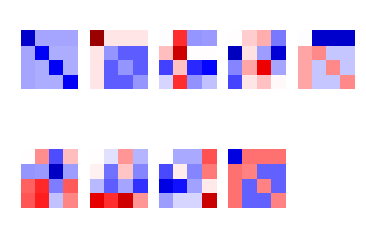

Null Space


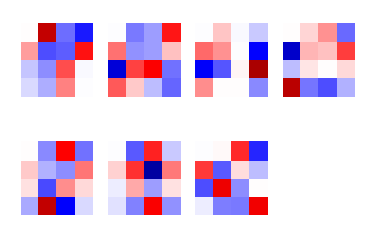

In [5]:
# plot row and null spaces
rsmax = np.max(v[:,0:p])
rsmin = np.min(v[:,0:p])
nsmax = np.max(v[:,p:m])
nsmin = np.min(v[:,p:m])

print('Row Space')
for i in range(p):
    idx = 250+1+i
    ax=plt.subplot(idx)
    x = np.reshape(v[:,i], (4,4))
    plt.pcolor(np.flipud(x), cmap='seismic',vmin=-0.8, vmax=0.8)
    plt.axis('off')
    plt.axis('equal')
plt.show()

print('Null Space')
for i in range(m-p):
    idx = 240+1+i
    ax=plt.subplot(idx)
    x = np.reshape(v[:,p+i], (4,4))
    plt.pcolor(np.flipud(x), cmap='seismic',vmin=-0.8, vmax=0.8)
    plt.axis('off')
    plt.axis('equal')

plt.show()


(10, 9)


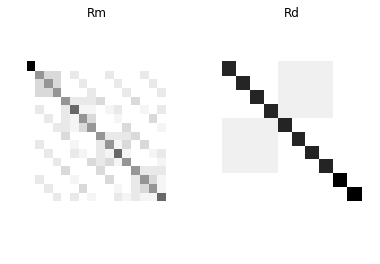

In [6]:
# plot data and model resolution

Rm = np.dot(vp,vp.T)
Rd = np.dot(up,up.T)
print(up.shape)

ax=plt.subplot(121)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.pcolor(np.flipud(Rm), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('Rm')

ax=plt.subplot(122)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.pcolor(np.flipud(Rd), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('Rd')
plt.show()










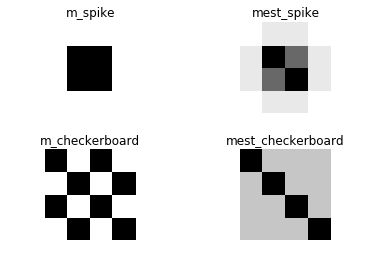

In [14]:
# spike test
mspike      = np.zeros((m,1))
mspike[np.array([5, 6, 9,10])] = 1
dspike      = np.dot(G,mspike)
Gt          = np.dot(np.dot(vp,smi), up.T)
mest1       = np.dot(Gt, dspike)
mspike_plot = np.reshape(mspike, (4,4))
mest1_plot  = np.reshape(mest1, (4,4))

# checkerboard test
mcb          = np.zeros((m,1))
mcb[np.array([0, 2, 5, 7, 8, 10, 13, 15])] = 1
dcb          = np.dot(G,mcb)
mest2        = np.dot(Gt, dcb)
mcb_plot     = np.reshape(mcb, (4,4))
mest2_plot   = np.reshape(mest2, (4,4))

ax=plt.subplot(221)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.pcolor(np.flipud(mspike_plot), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('m_spike')

ax=plt.subplot(222)
plt.pcolor(np.flipud(mest1_plot), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('mest_spike')

ax=plt.subplot(223)
plt.pcolor(np.flipud(mcb_plot), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('m_checkerboard')

ax=plt.subplot(224)
plt.pcolor(np.flipud(mest2_plot), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('mest_checkerboard')

plt.show()


In [25]:
# Problem 3
# Inputs
n     = 100
m     = 400
depth = 40.0

dm = depth/float(m)
dn = depth/float(n)
depths = np.linspace(0.0,depth,m) 

In [26]:
# Build G
g  = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        if(i*dn>j*dm):
            g[i,j]=dm
        elif(i*dn>=(j-1)*dm):
            g[i,j]=i*dn-(j-1)*dm

In [63]:
# Input model
mtrue = np.zeros((m))
for j in range(m):
    if(j>=(3*m)/8 and j<(5*m)/8):
        mtrue[j]=2.0
    else:
        mtrue[j]=2.0+3.0*float(j)/float(m)

# Input noisy data 
d=np.zeros((n))
np.random.seed(0)
d=np.dot(g,mtrue)+np.random.normal(0.0,0.1,n)

(100, 100) (100, 100) (400, 100) (400, 400)


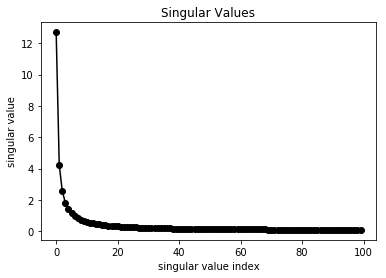

In [89]:
# SVD
[u, s, v] = np.linalg.svd(g)
v=v.T
n = u.shape[0]
m = v.shape[0]
p = np.linalg.matrix_rank(g)
up = u[:, 0:p]
vp = v[:, 0:p]
sp = s[0:p]


sm = np.eye(p,p)
for i in range(p):
    sm[i,i] = sp[i]
smi = np.linalg.inv(sm)

ax=plt.subplot(111)
xa = np.arange(s.shape[0])
plt.plot(xa, s, 'ok', xa, s, 'k')
ax.set_xlabel("singular value index")
ax.set_ylabel("singular value")
plt.title('Singular Values')
plt.show()


In [83]:
# SVD solutions
# p=rank
d      = np.dot(g,mtrue)
Gt1    = np.dot(np.dot(vp,smi), up.T)
mest1  = np.dot(Gt1, d)

#p=1/2 rank
p2   = int(p/2)
up2  = u[:, 0:p2]
vp2  = v[:, 0:p2]
sp2  = s[0:p2]
sm2 = np.eye(p2,p2)
for i in range(p2):
    sm2[i,i] = sp2[i]
smi2 = np.linalg.inv(sm2)

Gt2    = np.dot(np.dot(vp2,smi2), up2.T)
mest2  = np.dot(Gt2, d)

#p=1/5 rank
p3   = int(p/5)
up3  = u[:, 0:p3]
vp3  = v[:, 0:p3]
sp3  = s[0:p3]
sm3 = np.eye(p3,p3)
for i in range(p3):
    sm3[i,i] = sp3[i]
smi3 = np.linalg.inv(sm3)

Gt3    = np.dot(np.dot(vp3,smi3), up3.T)
mest3  = np.dot(Gt3, d)

#p=1
p4   = 1
up4  = u[:, 0:p4]
vp4  = v[:, 0:p4]
sp4  = s[0:p4]
sm4 = np.eye(p4,p4)
for i in range(p4):
    sm4[i,i] = sp4[i]
smi4 = np.linalg.inv(sm4)

Gt4    = np.dot(np.dot(vp4,smi4), up4.T)
mest4  = np.dot(Gt4, d)

#p=2
p5   = 4
up5  = u[:, 0:p5]
vp5  = v[:, 0:p5]
sp5  = s[0:p5]
sm5 = np.eye(p5,p5)
for i in range(p5):
    sm5[i,i] = sp5[i]
smi5 = np.linalg.inv(sm5)

Gt5    = np.dot(np.dot(vp5,smi5), up5.T)
mest5  = np.dot(Gt5, d)



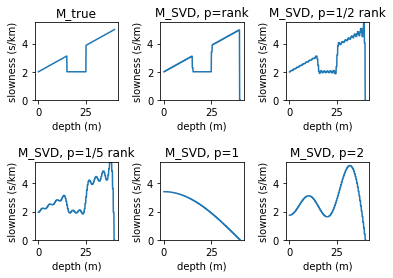

In [87]:
# plot
ax=plt.subplot(231)
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.plot(depths, mtrue)
plt.ylim(0,5.5)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_true')

ax=plt.subplot(232)
plt.plot(depths, mest1)
plt.ylim(0,5.5)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_SVD, p=rank')

ax=plt.subplot(233)
plt.plot(depths,mest2)
plt.ylim(0,5.5)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_SVD, p=1/2 rank')


ax=plt.subplot(234)
plt.plot(depths,mest3)
plt.ylim(0,5.5)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_SVD, p=1/5 rank')


ax=plt.subplot(235)
plt.plot(depths,mest4)
plt.ylim(0,5.5)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_SVD, p=1')


ax=plt.subplot(236)
plt.plot(depths,mest5)
plt.ylim(0,5.5)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_SVD, p=2')

plt.show()